In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

In [5]:
def getSeries(fileNames):  
    series = pd.Series() 
    for file in fileNames:
        with open('../data/'+file) as json_file:  
            result = json.load(json_file)

        for i in result['data']:
            series = series.append(pd.Series([i['marketCap']], index=[i['date']]))
    return series

Text(0.5, 0, 'Timeinterval')

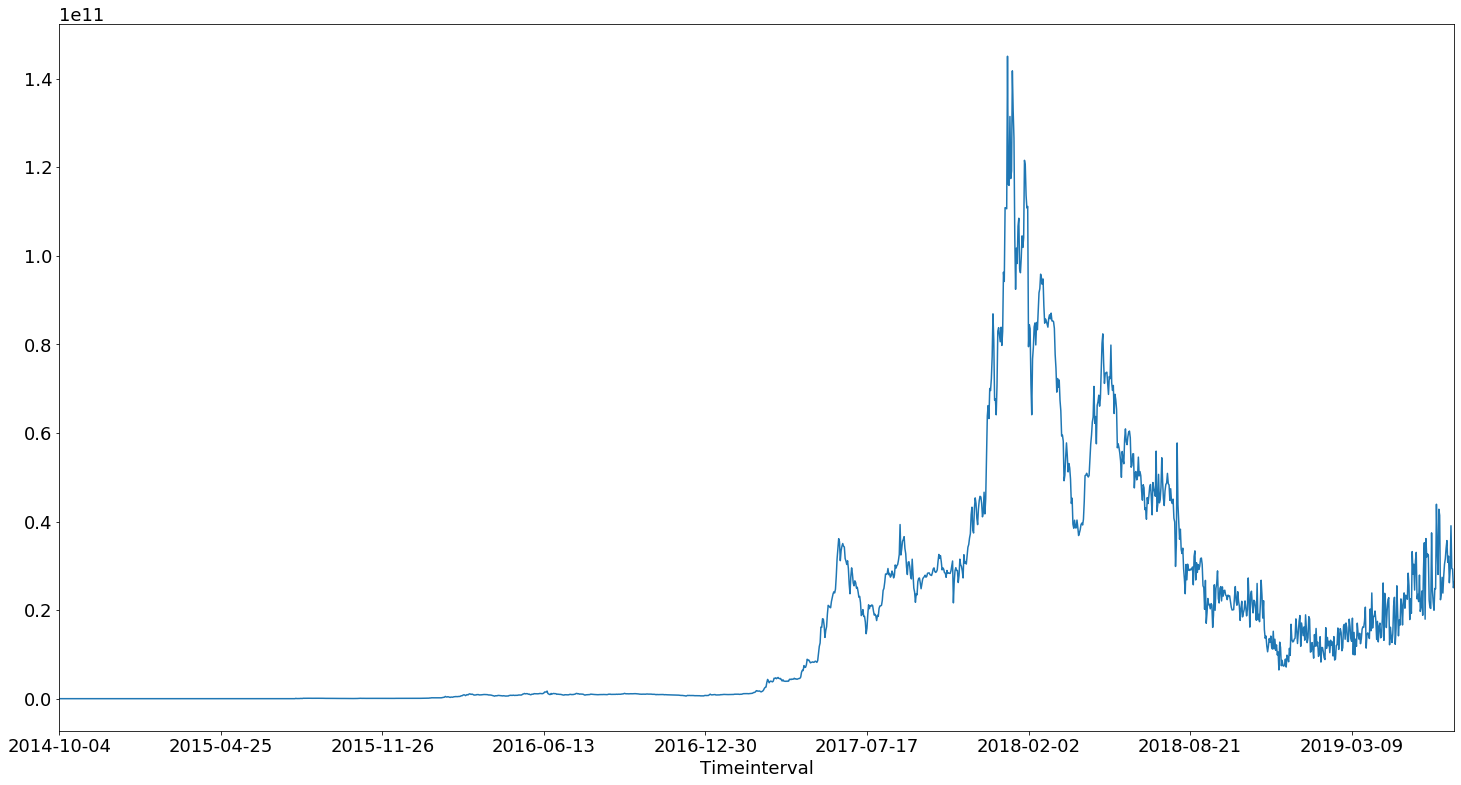

In [11]:
series = getSeries(fileNames = ["data_marketcap_ETH_2013-07-14_2015-07-14.json", "data_marketcap_ETH_2015-07-14_2017-07-14.json", "data_marketcap_ETH_2017-07-14_2019-07-14.json"])
series.sort_index(inplace=True)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
series.plot(figsize=(25,13))
plt.xlabel('Timeinterval', fontsize=18)


Text(0.5, 0, 'Timeinterval')

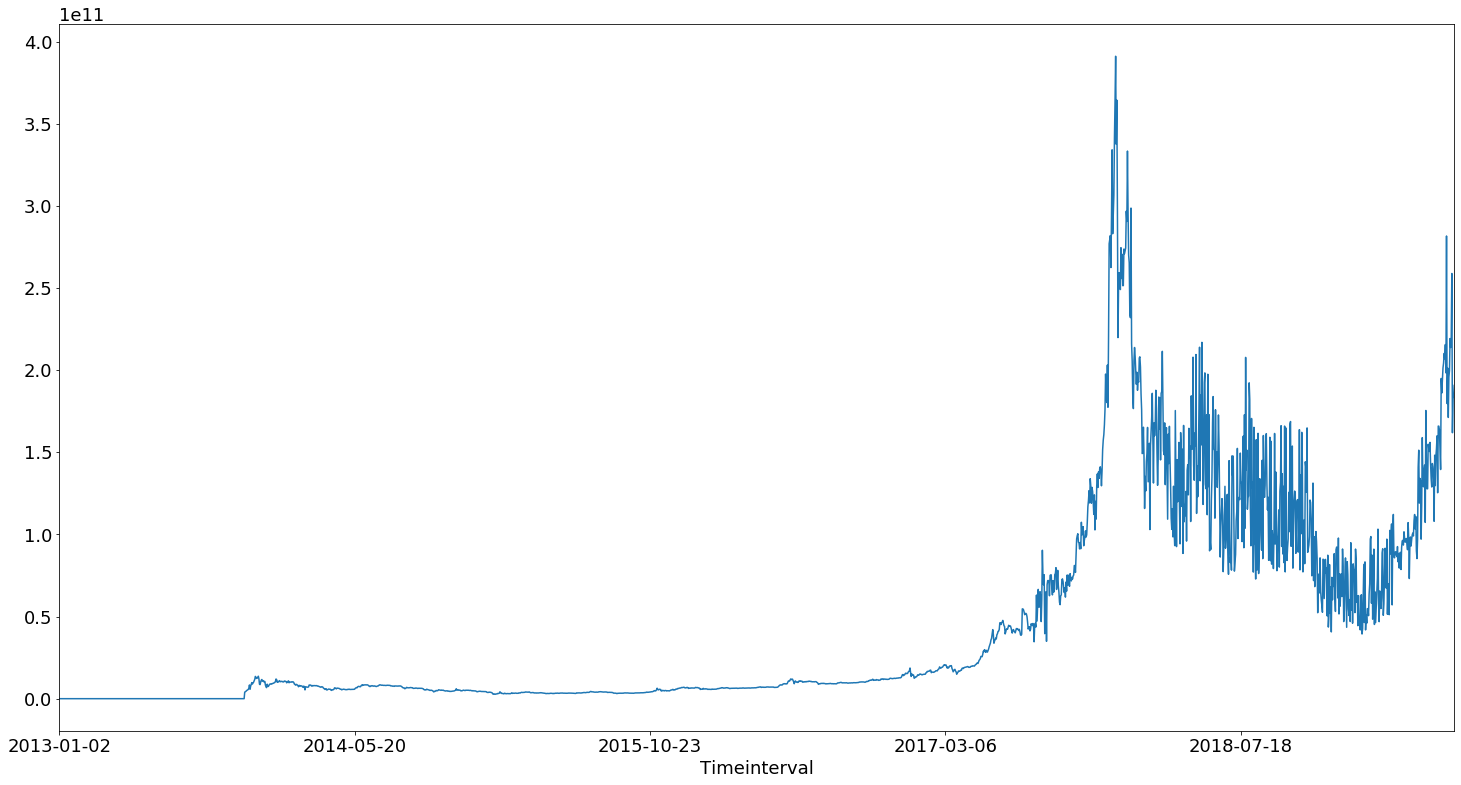

In [10]:
series = getSeries(fileNames = ["data_marketcap_2017-07-14_2019-07-14.json", "data_marketcap_2015-07-14_2017-07-14.json","data_marketcap_2013-07-14_2015-07-14.json","data_marketcap_2011-07-14_2013-07-14.json"])
series.sort_index(inplace=True)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
series.plot(figsize=(25,13))
plt.xlabel('Timeinterval', fontsize=18)